# Laboratory 2.4: Linear Regression contd.

In this practice you will extend your Linear Regression code to a more general case. Here you will need the `synthetic_dataset.csv` present in the .zip file you downloaded alongside this notebook.

In addition, we will be using the following libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
    - [scipy](https://scipy.org/)
- Modelling:
    - [scikit-learn](https://scikit-learn.org)
- Plotting:
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)
    
### **All the things you need to do are marked by a "TODO" comment nearby. Make sure you *read carefully everything before working* and solve each point before submitting your solution.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os
import sys
# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.insert(0, project_root)

### Custom Linear Regression model

You are going to be working with the following class that you already know from the previous practice, so feel free to recycle as much code as you want (or can). In this case, you will be enhancing its functionalities, getting a more general function than the one you implemented before. 

**For now, just continue with the practice and do not fill anything, you will come back later to fill the gaps.**

In [2]:
from src.Lab_2_4_LR2 import LinearRegressor


**Data**: Remember, from the previous lab session, we had the following univariate dataset:

In [3]:
# Define data to use in this practice
x_slides = np.array([0, 3, 2, 1, 4, 6, 7, 8, 9, 10])
y_slides = np.array([2, 3, 2, 4, 5, 7, 9, 9, 10, 13])

Use the code *you wrote* from the previous practice (not the sklearn version) to fit the data in the following cell

In [4]:
linreg = LinearRegressor()
linreg.fit(x_slides, y_slides)

Before we get into the things you'll do today, let's construct a function that provides the values for the $R^2$, RMSE and MAE. For this, the inputs of this function are the true $y$ values and the predicted $\hat{y}$ values

In [5]:
from src.Lab_2_4_LR2 import evaluate_regression

In [6]:
# Obtain regression performance metrics
y_pred = linreg.predict(x_slides)
evaluation_metrics = evaluate_regression(y_slides, y_pred)
print(evaluation_metrics)

{'R2': np.float64(0.9201359388275276), 'RMSE': np.float64(1.0126472956832233), 'MAE': np.float64(0.8945454545454539)}


## Polynomial regression

In the previous practice, you have trained a model assuming that the relationship between input and output is linear. However, in most real cases this is not common and the relationship between input and output is not linear. In this section, we are going to learn how to deal with non-linear relationships when using linear models. Read `synthetic_dataset.csv` and train a linear regression model. 

*The target variable is the last column of the dataset*

In [7]:
data = pd.read_csv("../data/synthetic_dataset.csv")

# TODO: Obtain inputs and output from data
X = data[["Input1", "Input2", "Input3", "Input4"]].values
y = data["Output"]

In this case we will skip the preprocessing and go straight to the modelling phase. Therefore, fit the model here.

In [8]:
# TODO: Train linear regression model
model = LinearRegressor()
model.fit(X, y)

In [9]:
# TODO: Obtain and print the regression performance metrics
model_predictions = model.predict(X)
evaluation_metrics = evaluate_regression(y, model_predictions)
print(evaluation_metrics)

{'R2': 0.5452814241832915, 'RMSE': np.float64(3.193645274870281), 'MAE': 2.2373945210247843}


If you trained the model well, the $R^2$ metric will be terrible, in the order of $0.5$. **What happened here?** Let's try to clear this via the *study of the residuals*.

Create a function to plot the residuals of the model. This function shall:
- Create a **histogram** of the residuals.
- Create a **Q-Q plot** of the residuals.
- Create a **scatterplot of the residuals against each input variable, the true output variable and the predictions**.

**Why do we want to check the residuals this way?** 

> We want to check thgat the residuals are normally distributed which will mean that there is no unstudied trend on the residuals and that the model is well adjusted.

In [10]:
def plot_residuals(data, output_column, prediction_column):
    """
    Plot residuals of a model against all variables in the DataFrame, using box plots for
    categorical variables and scatter plots for continuous variables. Additionally, plot
    a histogram and a QQ-plot of the residuals.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output column.
        prediction_column (str): The name of the prediction column.
    """
    # TODO: Calculate residuals
    residuals = data[prediction_column] - data[output_column]
    
    num_features = len(data.columns) - 2  # Exclude output and prediction columns

    # Determine the number of rows and columns for subplots
    num_rows = int(np.ceil(np.sqrt(num_features + 4)))  # Add 4 for histogram, Q-Q plot, true output vs residuals, and predictions vs residuals
    num_cols = int(np.ceil((num_features + 4) / num_rows))

    # Plot histogram of residuals
    plt.figure(figsize=(5 * num_cols, 4 * num_rows))
    plt.subplot(num_rows, num_cols, 1)
    plt.hist(residuals, bins=30, edgecolor='black')
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # TODO: Plot Q-Q plot of residuals (tip: use stats.probplot from scipy)
    plt.subplot(num_rows, num_cols, 2)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot of Residuals')

    # TODO: Plot residuals against output variable
    plt.subplot(num_rows, num_cols, 3)
    plt.scatter(data[output_column], residuals, alpha=0.5)     # Fill the code here
    plt.title('Residuals vs True Output')
    plt.xlabel('True Output')
    plt.ylabel('Residuals')

    # Plot residuals against prediction variable
    plt.subplot(num_rows, num_cols, 4)
    plt.scatter(data[prediction_column], residuals, alpha=0.5)   # Use this as example for later
    plt.title('Residuals vs Predictions')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')

    # TODO: Plot residuals against each input variable
    for i, col in enumerate(data.columns):
        if col not in [output_column, prediction_column]:
            plt.subplot(num_rows, num_cols, i + 5)
            plt.scatter(data[col], residuals, alpha=0.5)
            plt.title(f'Residuals vs {col}')
            plt.xlabel(col)
            plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()

Now, **print the coefficients** of the model **alongside the plots** you can generate with the previous function

Coefficients of the model: {'Input 1': np.float64(-0.0019118098357402448), 'Input 2': np.float64(-0.005980294661835375), 'Input 3': np.float64(1.6303240019912557), 'Input 4': np.float64(3.059308730603961)}


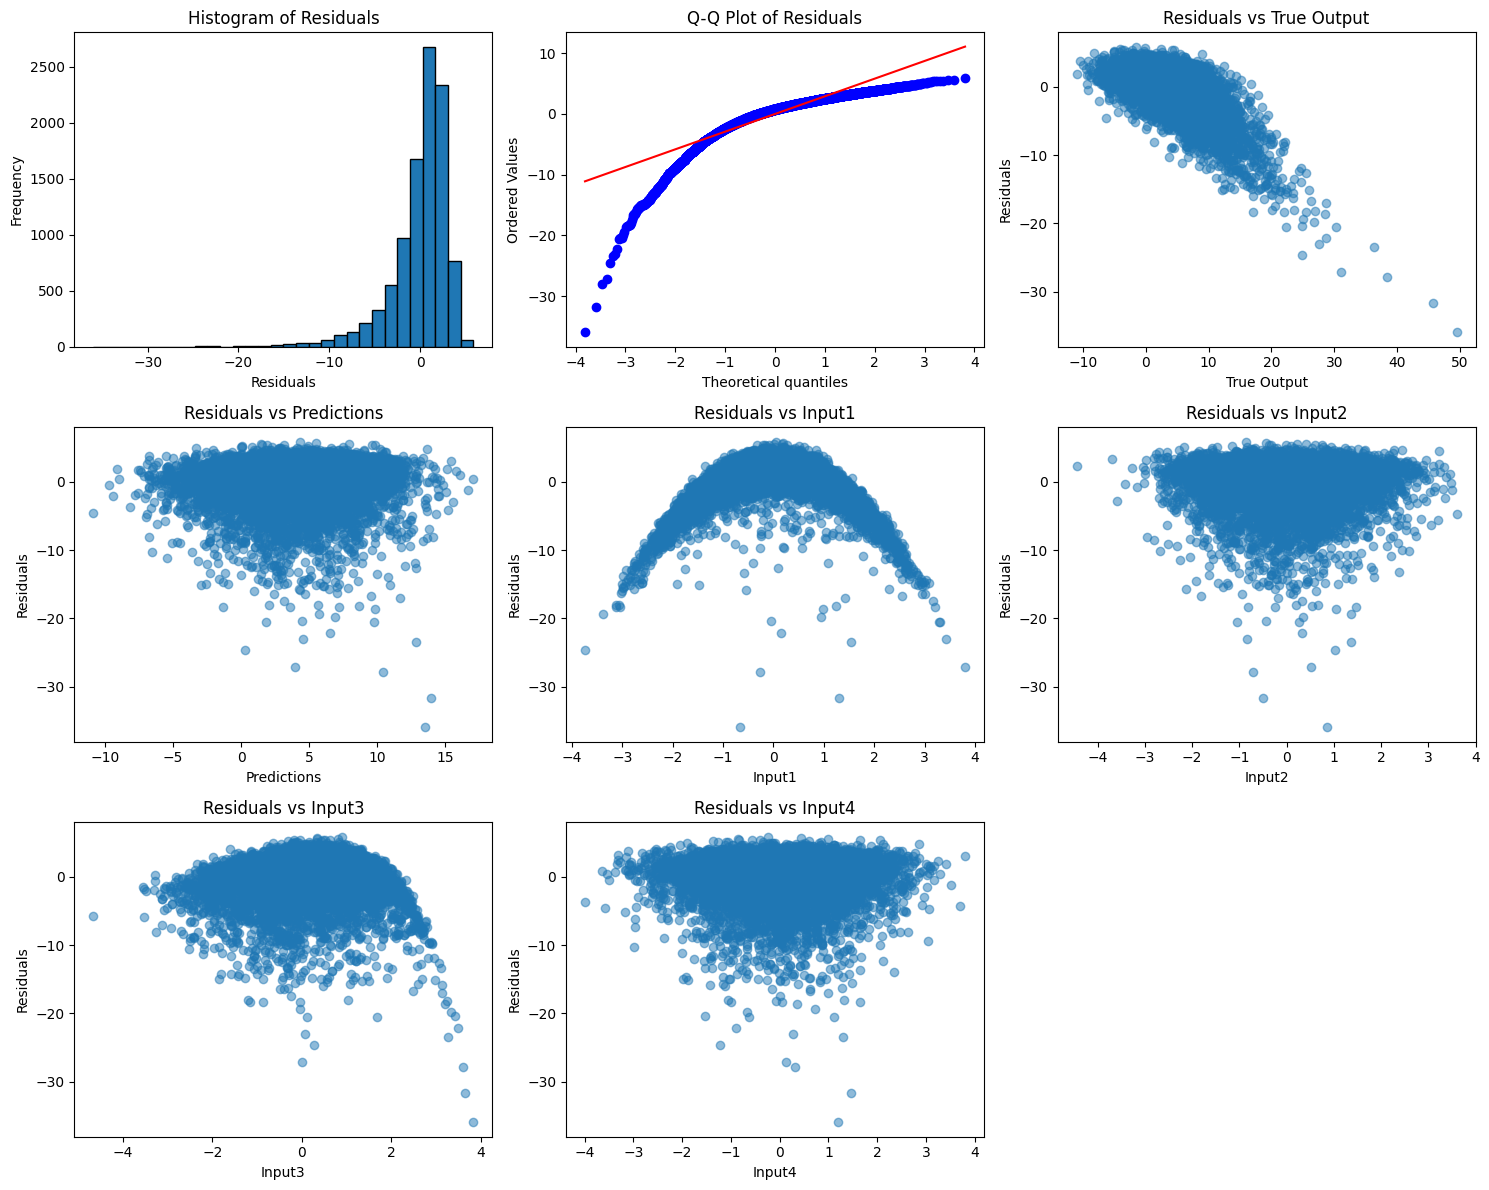

In [11]:
# TODO:  First, construct a dictionary of the coefficients to print them
coef_dict = {col: coef for col, coef in zip(["Input 1", "Input 2", "Input 3", "Input 4"], model.coefficients)} 
print(f"Coefficients of the model: {coef_dict}")

# Plot the residuals for the predictions
data["Predictions"] = model.predict(X)
plot_residuals(data, 'Output', 'Predictions')

**What are we seeing here? Is there any way to improve the model?**
> The residuals are skewed to the right and the QQ plot shows that the results are not normally distributed, which means that the model is not correctly adjusted, there is a nonlinear tendency that the mmodel is not capturing. A way to improve the model would be to play with the variable that describes the "amount" of input of the feature 1 (perhaps x^2) as it is the residuals of this feature the ones that differ the most from a normal distributed residuals.

As you may expect, you should see some higher-order contribution to the behavior of the data, since some of the residuals have clear structures. In particular, `Input1` has a higher-order polynomial contribution (*which order do you think?*), while `Input2` has an *exponential* form. 

In order to fit a regression model with these contributions, construct a new dataframe where each column corresponds to the desired manipulation of each variable. Then, fit the regression model and see the results.

* Also, pay attention to the fact that you can use whatever contribution you see fit here, not just these previous ones.

In [12]:
# TODO
data_transf = pd.DataFrame({'Input1': data['Input1'] ** 2,   # Substitute "None" by the degree you think works here
                            'Input2': np.exp(data['Input3']),
                            'Input3': data['Input4'],
                            'Output': data['Output']})
X_transf = data_transf.iloc[:,:3].values

# Train linear regression model
linreg = LinearRegressor()
linreg.fit(X_transf, y)

# Evaluate the metrics to see the behavior
y_pred = linreg.predict(X_transf)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.9557524745534756, 'RMSE': np.float64(0.9962304737909358), 'MAE': 0.7956340344398113}


Now, print again the coefficients for the model and plot the residuals as you did before.

**What do you observe?**
> The residuals now are gaussian distributed and the QQ plot is correctly adjusted. This plots in combination with the 0.95 R^2 value show that the model is correctly adjusted studying all the trends present in the data.

Coefficients of the model: {'Input1': np.float64(1.9985407741302774), 'Input2': np.float64(0.995125930021854), 'Input3': np.float64(2.9880699293625486)}


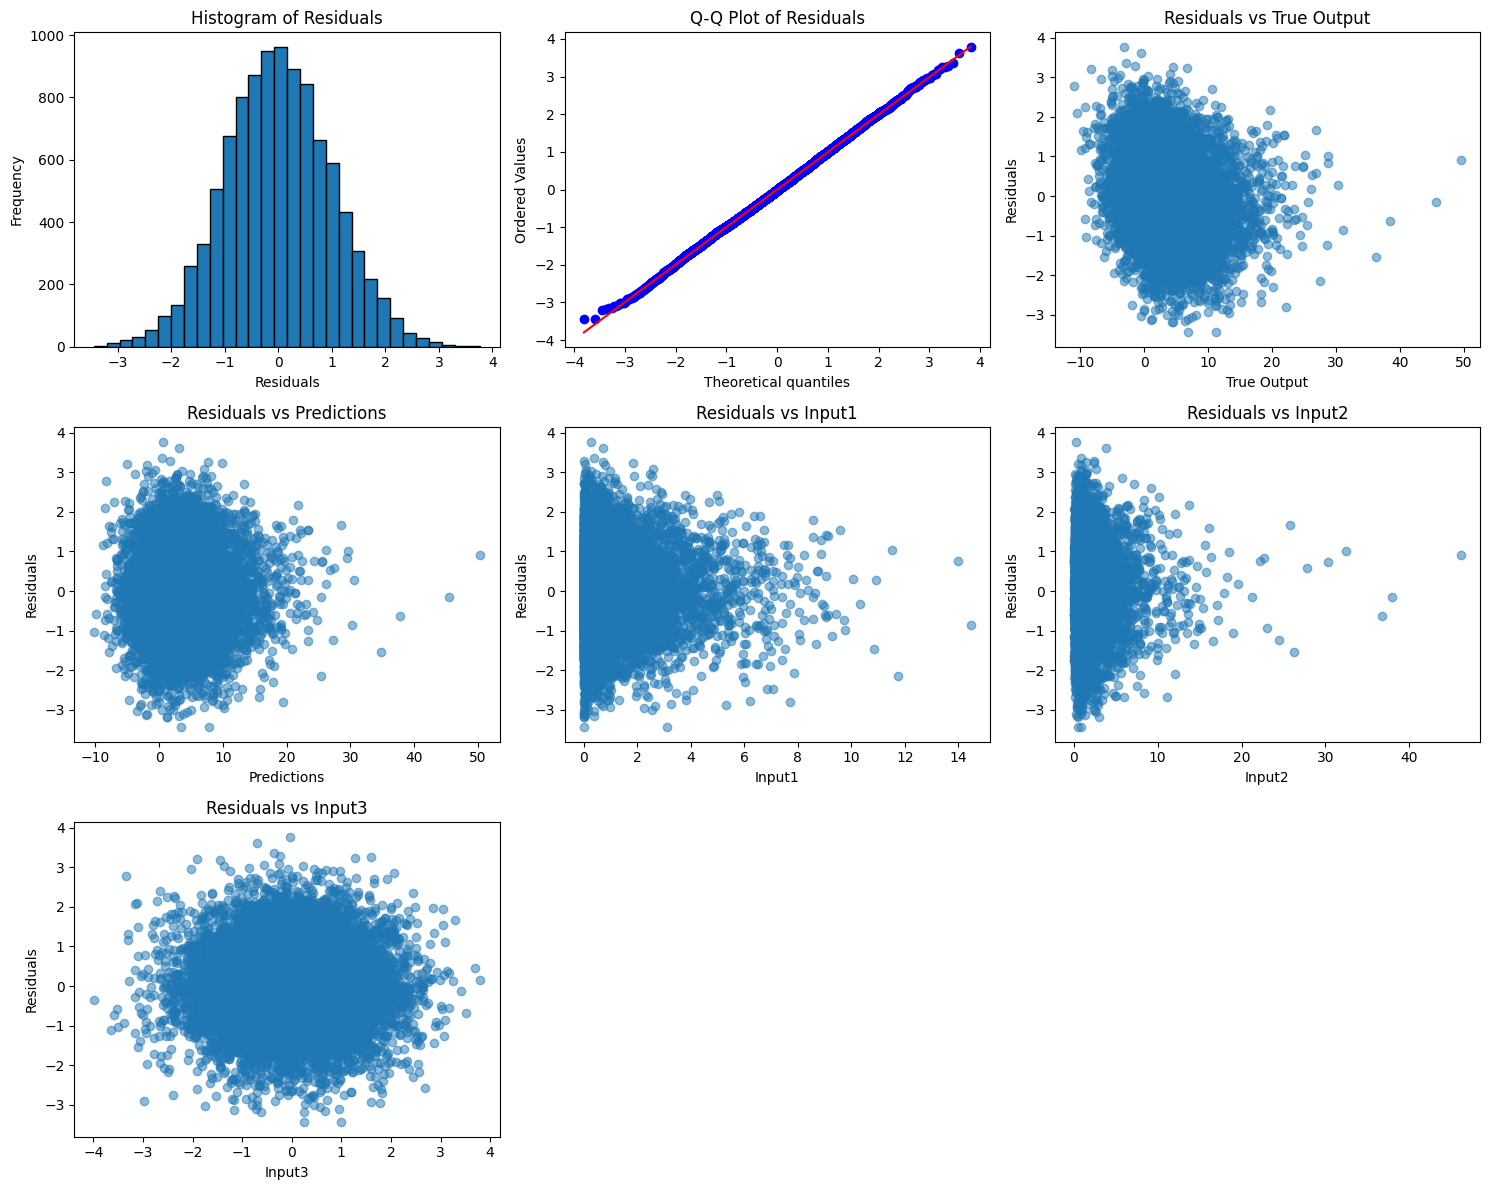

In [13]:
coef_dict = {'Input' + str(i+1): coef for i, coef in enumerate(linreg.coefficients)}
print(f"Coefficients of the model: {coef_dict}")
data_transf["Predictions"] = linreg.predict(X_transf)
plot_residuals(data_transf, 'Output', 'Predictions')

## Categorical variables

Linear regression, as is, can not deal with categorical variables. Therefore, we need to encode the variables when preprocessing the data. Complete the one-hot-encode function below. Take into account that strings shall be treated automatically as categorical variables.
<center>

![Image](https://miro.medium.com/v2/resize:fit:1358/1*ggtP4a5YaRx6l09KQaYOnw.png)

</center>

In [14]:
from src.Lab_2_4_LR2 import one_hot_encode


We will use this in a usual dataset from the internet. If everything is well, you should be able to run the following code as-is.

In [15]:
# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)


y = data['charges'].values
X = data.drop(columns=['charges']).values

# Preprocess the data
# Identify categorical columns for one-hot encoding
categorical_columns = [data.columns.get_loc(col) for col in ['sex', 'smoker', 'region']]

# One-hot encode categorical variables
X_encoded = one_hot_encode(X, categorical_columns, drop_first=True)
X_encoded = X_encoded.astype(float)                                  # Watch out for this!

# Instantiate and fit the LinearRegressor
model = LinearRegressor()
model.fit(X_encoded, y)

# Predict and evaluate
y_pred = model.predict(X_encoded)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': np.float64(0.7509130345985199), 'RMSE': np.float64(6041.679651174457), 'MAE': np.float64(4170.886894163565)}


Compare yourself with scikit

In [16]:
from sklearn.linear_model import LinearRegression

# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)

# Preprocess the data
# TODO: One-hot encode categorical variables. Use pd.get_dummies()
data_encoded = pd.get_dummies(data) 

# Split the data into features (X) and target (y)
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Instantiate the LinearRegression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X, y)

# Make predictions on the test data
y_pred = model.predict(X)

# Evaluate the model
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)


{'R2': 0.7509130345985205, 'RMSE': np.float64(6041.6796511744515), 'MAE': 4170.886894163588}


### Colored residuals

Now that we have categorical variables, the relationship between inputs and outputs might differ for different levels of the categorical variables. Therefore, you will modify the `plot_residuals` function to **color the scatter plots based on the value of a specific categorical variable**.

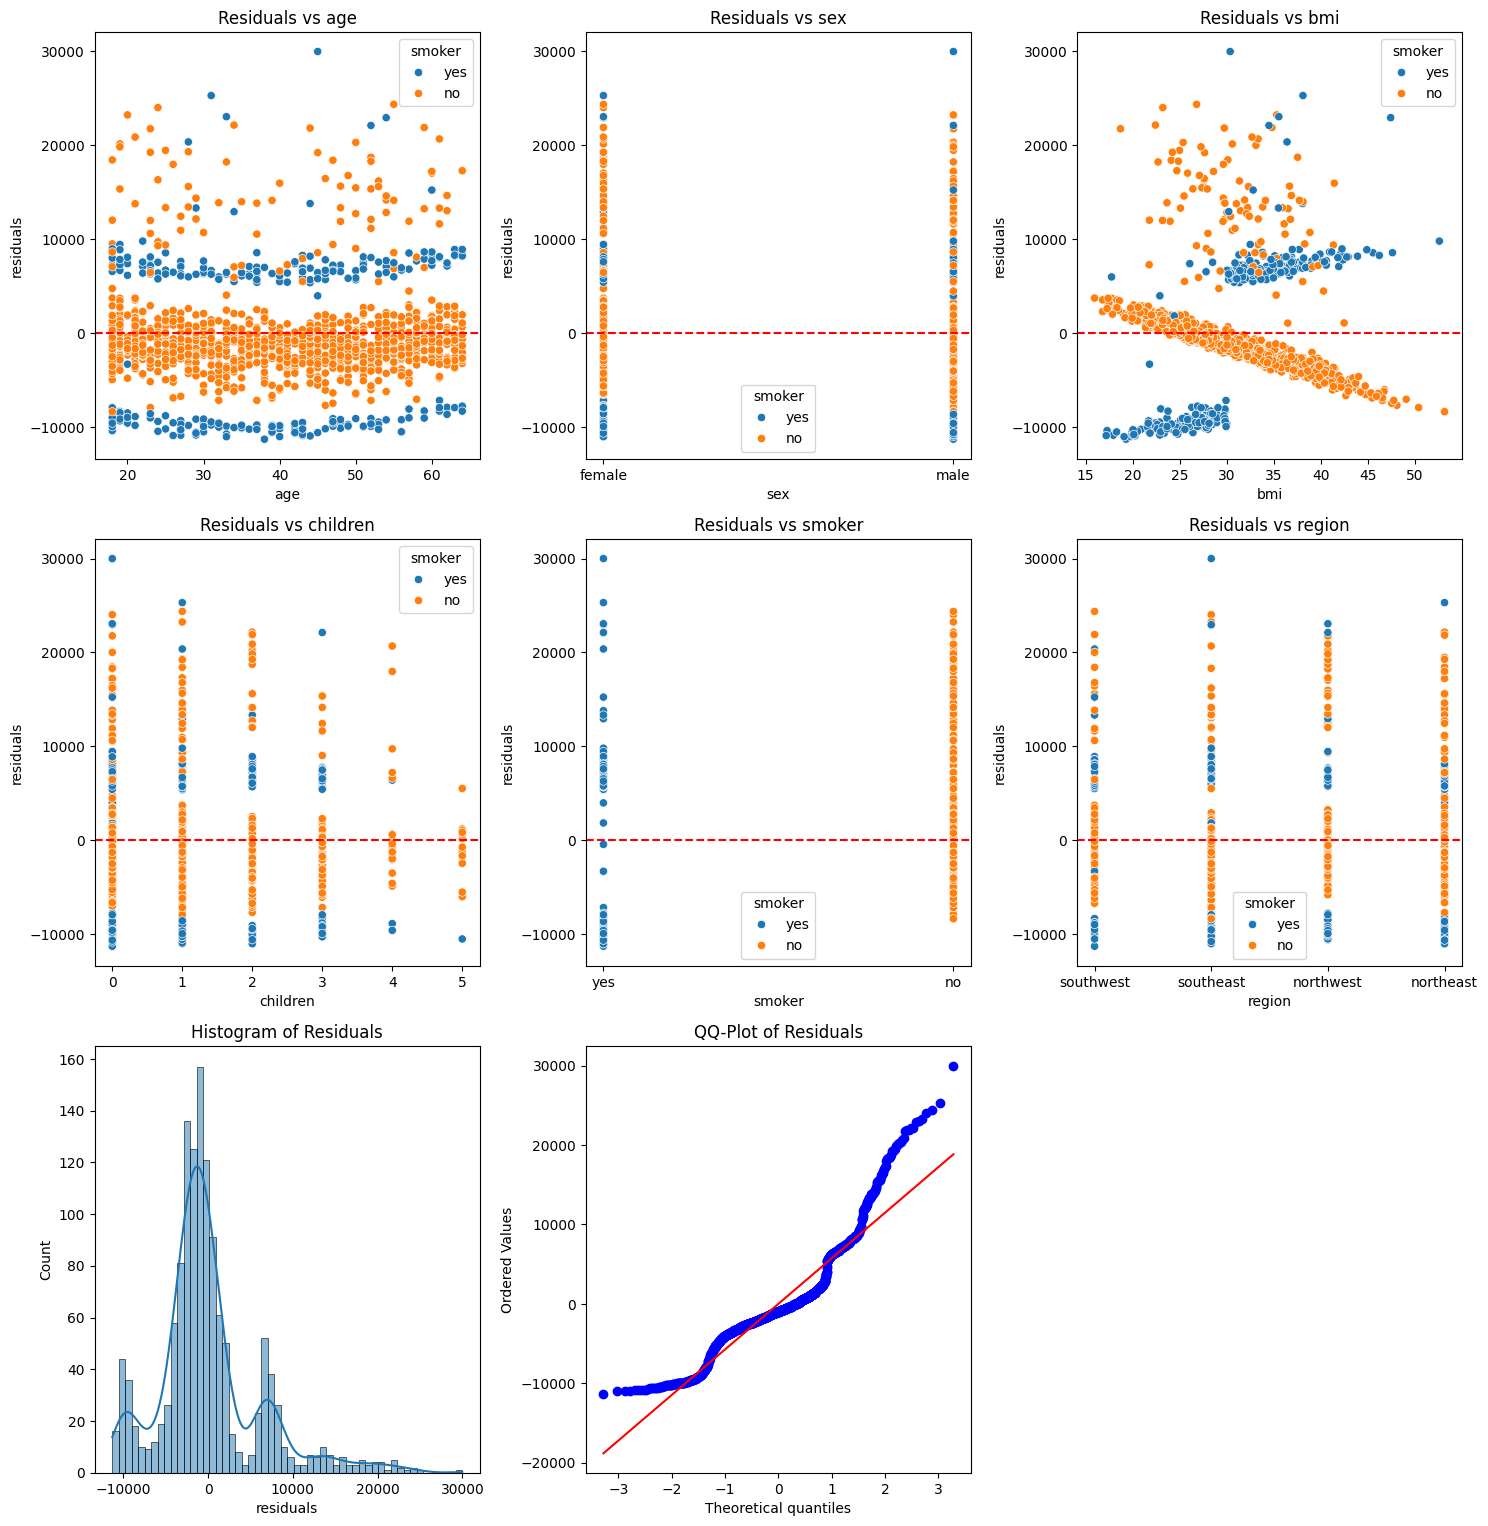

In [17]:
def plot_residuals(data, output_column, prediction_column, categorical_var=None):
    """
    Plot residuals of a model against all variables in the DataFrame. Additionally, plot
    a histogram and a QQ-plot of the residuals.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output column.
        prediction_column (str): The name of the prediction column.
        categorical_var (str, optional): The name of a categorical variable for coloring. Defaults to None.
    """
    # TODO: As before, calculate residuals
    data['residuals'] = data[output_column] - data[prediction_column]

    # Identify columns to plot (excluding the output and prediction columns)
    columns_to_plot = [col for col in data.columns if col not in [output_column, prediction_column, 'residuals']]

    # Number of rows and columns for the subplot
    n_cols = 3
    n_rows = int(len(columns_to_plot) / n_cols) + 2  # Additional row for histogram and QQ-plot

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # TODO: Plot each variable against the residuals
    for i, col in enumerate(columns_to_plot):
        ax = axes[i]
        
        if categorical_var and categorical_var in data.columns:
            sns.scatterplot(x = data[col], y = data["residuals"], data=data, ax=ax, hue = categorical_var)
        else:
            sns.scatterplot(x = data[col], y = data["residuals"], data=data, ax=ax)
        
        ax.set_title(f'Residuals vs {col}')
        ax.axhline(0, ls='--', color='r')

    # Histogram of residuals
    sns.histplot(data['residuals'], kde=True, ax=axes[i + 1])
    axes[i + 1].set_title('Histogram of Residuals')

    # QQ-plot of residuals
    stats.probplot(data['residuals'], dist="norm", plot=axes[i + 2])
    axes[i + 2].set_title('QQ-Plot of Residuals')

    # Hide any unused axes
    for j in range(i + 3, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

data['predictions'] = model.predict(X)
# Example usage
plot_residuals(data, 'charges', 'predictions', 'smoker')


**What's happening with the residuals?**
> The residuals are not perfectly gaussian as it is a trimodal distribution, however the QQ plot is not extremely bad and the R^2 value is 0.75. Taking all this into account, there is a trend that the model is not capturing (probably on the bmi variable) however the unstudied trend is not as important as the one of the previous exercise.

# _Rolling in the deep_

Following the theory taught in class, do the following:

1. **implement the gradient descent algorithm** to train the linear regression model and reproduce the results using this training method. You can find the structure for the gradient descent inside the initial linear regression function, inside the method `fit_gradient_descent`.
2. As final steps, **display the progress of the loss function by plotting the gradient descent steps on the X-axis and the loss function on the Y-axis for each step**. 
3. Additionally, **using the same representation as in the previous section where each axis represents the values of w and b, show the sequence of steps that bring you closer to the optimum each time**. Each step should be a point in space, with coordinates (w,b). Compare all the results with the optimal solution from the scikit fit coefficients.

Feel free to add as many cells as you may need from here onwards in order to fulfill these three tasks

In [18]:
import time

# Optimal coefficients own implementation
optimal_model = LinearRegressor()

t0 = time.time()

optimal_model.fit(x_slides, y_slides, method='least_squares')
y_pred = optimal_model.predict(x_slides)

t_optimal = time.time() - t0
print("Optimal model time: ", t_optimal)

evaluation_metrics = evaluate_regression(y_slides, y_pred)
print("Optimal model evaluation: ",evaluation_metrics, "\n")

# Gradient Descent own implementation
gradient_model = LinearRegressor()

t0 = time.time()

(gradients, weights, biases, losses) = gradient_model.fit(x_slides, y_slides, method='gradient_descent')
y_pred = gradient_model.predict(x_slides)

t_gradient = time.time() - t0
print("Gradient descent time: ", t_gradient)

evaluation_metrics = evaluate_regression(y_slides, y_pred)
print("Gradient descent implementation: ",evaluation_metrics, "\n")

from sklearn.linear_model import LinearRegression

# Sklearn implementation
sklearn_model = LinearRegression()

t0 = time.time()

sklearn_model.fit(x_slides.reshape(-1, 1), y_slides)
y_pred = sklearn_model.predict(x_slides.reshape(-1, 1))

t_sklearn = time.time() - t0
print("Sklearn model time: ", t_sklearn)

evaluation_metrics = evaluate_regression(y_slides, y_pred)
print("Sklearn model evaluation: ",evaluation_metrics)



Optimal model time:  0.0009999275207519531
Optimal model evaluation:  {'R2': np.float64(0.9201359388275276), 'RMSE': np.float64(1.0126472956832233), 'MAE': np.float64(0.8945454545454539)} 

Epoch 0: MSE = 53.40790867635195
Epoch 100: MSE = 1.2096303136355389
Epoch 200: MSE = 1.1264969078307463
Epoch 300: MSE = 1.0808883253453418
Epoch 400: MSE = 1.0558665813641988
Epoch 500: MSE = 1.0421391722289068
Epoch 600: MSE = 1.0346080520276248
Epoch 700: MSE = 1.0304763348967974
Epoch 800: MSE = 1.0282095955548523
Epoch 900: MSE = 1.0269660188332048
Gradient descent time:  0.030272960662841797
Gradient descent implementation:  {'R2': np.float64(0.9200713575725437), 'RMSE': np.float64(1.013056646376963), 'MAE': np.float64(0.8943411007234967)} 

Sklearn model time:  0.0009999275207519531
Sklearn model evaluation:  {'R2': np.float64(0.9201359388275276), 'RMSE': np.float64(1.0126472956832233), 'MAE': np.float64(0.8945454545454549)}


By observing the results, we can assure that the sklearn implementation uses the least squares method (or closed solution) as it obtains the same results as the one implemented by hand. Another interesting thing to notice is how the gradient descent algorithm converges to the same solution as the least squares method and just one magnitude order slower.

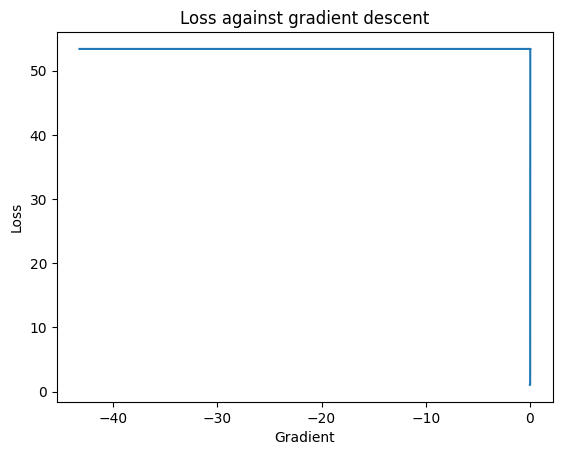

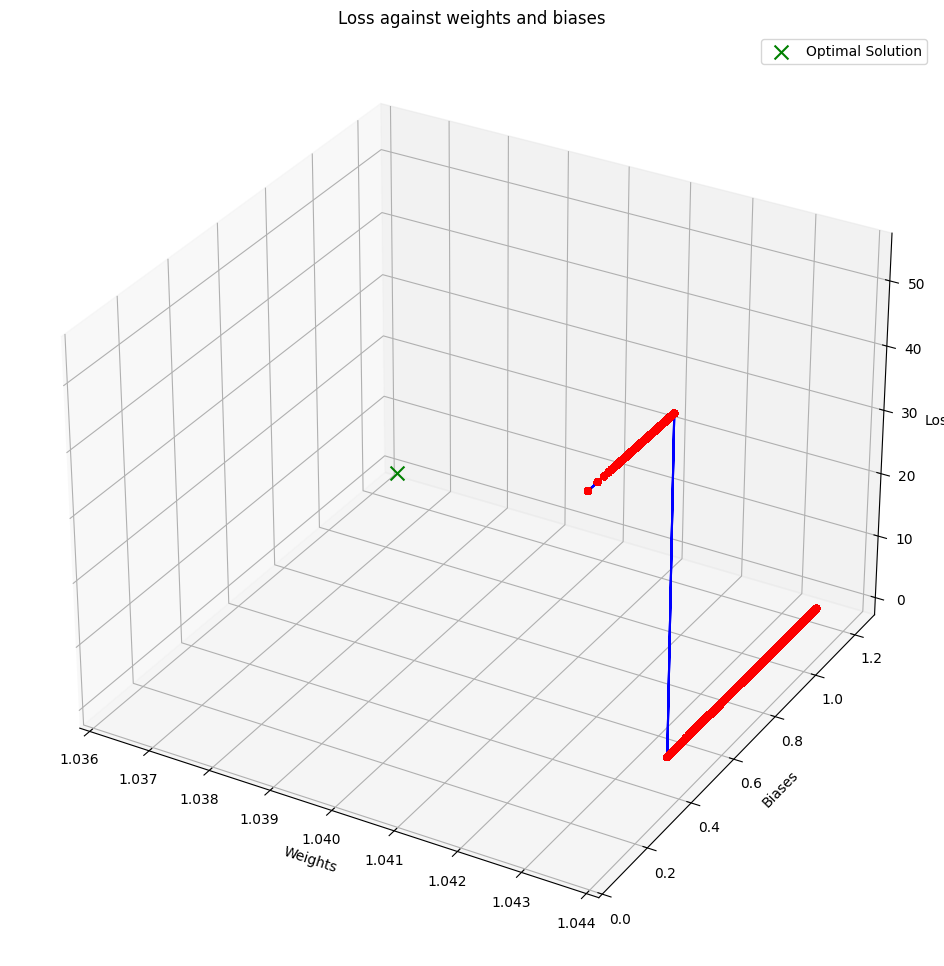

In [20]:
# Loss against gradient
plt.plot(gradients, losses)
plt.title("Loss against gradient descent")
plt.xlabel("Gradient")
plt.ylabel("Loss")
plt.show()

# Loss against weights and biases
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights, biases, losses, c='r', marker='o')
ax.set_xlabel('Weights')
ax.set_ylabel('Biases')
ax.set_zlabel('Loss')
ax.set_title("Loss against weights and biases")

# Plot the sequence of steps
for i in range(len(weights) - 1):
    ax.plot([weights[i], weights[i + 1]], [biases[i], biases[i + 1]], [losses[i], losses[i + 1]], 'b-')

# Plot the optimal solution from the scikit fit coefficients
optimal_weight = sklearn_model.coef_[0]
optimal_bias = sklearn_model.intercept_
optimal_loss = evaluate_regression(y_slides, sklearn_model.predict(x_slides.reshape(-1, 1)))['RMSE']
ax.scatter(optimal_weight, optimal_bias, optimal_loss, c='g', marker='x', s=100, label='Optimal Solution')

plt.legend()
plt.show()


It can be seen how as long as there is a gradient, the loss function can be optimized until it reaches the minimum, where there is no slope and therefore the model can not be improved. It is true that the gradient descent model does not exactly converge to the optimal solution, but the difference is minimal. Maybe the optimal point could be obtained with a better initialization of the parameters, however by leaving it perform more iterations it probably won't converge as right now it is on a valley with a very very low slope. This is not a problem as on practice a local minimum can work as well as the global one and there are less probabilities of overfitting.